What Churn is in this business context?

In this business context, churn refers to customers who stop using the company’s service or cancel their subscription within a given time period.

Why is churn important to measure and reduce?
1. High churn rates mean the company must constantly acquire new customers just to maintain revenue levels, which is costly.
2. Reducing churn improves profitability by maximizing the lifetime value of current customers.
3. By measuring churn and understanding its drivers, the business can: Identify high-risk customers, and Offer personalized discounts, upgrades, or support.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn 2.csv")

print("----DataFrame----")
df.head()

----DataFrame----


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Create a copy of the original dataframe
df1 = df.copy()

EXPLORATORY DATA ANALYSIS

In [4]:
# Display the columns of the dataframe
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print("----DataFrame Info----")
print("\n")
df1.info()

----DataFrame Info----


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [6]:
# check for duplicate rows
duplicate_rows = df1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [7]:
# check for missing values
missing_values = df1.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Statistical summary of the dataframe
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Distribution of the target variable 'Churn'
df1['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

ENCODING OF CATEGORICAL VARIABLES

In [10]:
# Data Preprocessing, and Encoding Categorical Variables

# Convert 'Yes'/'No' to 1/0 for binary categorical variables
df1['Churn'] = df1['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df1['gender'] = df1['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df1['Partner'] = df1['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df1['Dependents'] = df1['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df1['PhoneService'] = df1['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df1['PaperlessBilling'] = df1['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encoding for categorical variables with more than two categories
df1 = pd.get_dummies(df1, columns=['MultipleLines'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['InternetService'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['OnlineSecurity'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['OnlineBackup'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['DeviceProtection'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['TechSupport'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['StreamingTV'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['StreamingMovies'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Contract'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['PaymentMethod'], drop_first=True)

# Convert boolean columns to integers
bool_cols = df1.select_dtypes(include='bool').columns
df1[bool_cols] = df1[bool_cols].astype(int)

print("----Preprocessed DataFrame----")
df1.head()

----Preprocessed DataFrame----


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Drop the 'customerID' column as it is not needed for analysis
df1.drop('customerID', axis=1, inplace=True)

In [12]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [14]:
# Correlation matrix of the dataframe 
df1.corr(numeric_only=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,-0.008612,0.006488,...,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.150889,-0.008576,...,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,-0.150448,-0.017706,...,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,-0.164221,0.001762,...,0.063268,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,-0.352229,-0.008448,...,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.011942,-1.000000,...,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,-0.007721,0.003062,-0.003319
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.191825,-0.016505,...,0.037880,-0.321013,0.223841,-0.321013,0.211716,-0.051391,-0.147889,-0.013589,0.208865,-0.205398
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.193356,-0.247398,...,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.030550,0.271625,-0.377437
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000,-0.011942,...,-0.164674,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,-0.134302,0.301919,-0.091683
MultipleLines_No phone service,0.006488,-0.008576,-0.017706,0.001762,-0.008448,-1.000000,-0.016505,-0.247398,-0.011942,1.000000,...,0.096340,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,0.007721,-0.003062,0.003319


In [15]:
# Data types of the dataframe
df1.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [16]:
# Count of blank spaces in each column
(df1 == ' ').sum().sort_values(ascending=False)


TotalCharges                             11
gender                                    0
OnlineBackup_No internet service          0
PaymentMethod_Electronic check            0
PaymentMethod_Credit card (automatic)     0
Contract_Two year                         0
Contract_One year                         0
StreamingMovies_Yes                       0
StreamingMovies_No internet service       0
StreamingTV_Yes                           0
StreamingTV_No internet service           0
TechSupport_Yes                           0
TechSupport_No internet service           0
DeviceProtection_Yes                      0
DeviceProtection_No internet service      0
OnlineBackup_Yes                          0
OnlineSecurity_Yes                        0
SeniorCitizen                             0
OnlineSecurity_No internet service        0
InternetService_No                        0
InternetService_Fiber optic               0
MultipleLines_Yes                         0
MultipleLines_No phone service  

In [17]:
# Replace blank spaces with NaN
df1 = df1.replace(' ', np.nan)

In [18]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [19]:
df1 = df1.dropna()

In [20]:
# Correlation of numeric features with 'Churn'
numeric_df = df1.select_dtypes(include='number')
numeric_df.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


In [21]:
# Selecting recommended features based on correlation analysis
recommended_features = [
    "tenure",
    "Contract_Two year",
    "Contract_One year",
    "MonthlyCharges",
    "InternetService_Fiber optic",
    "PaymentMethod_Electronic check",
    "PaperlessBilling",
    "SeniorCitizen",
    "OnlineSecurity_Yes",
    "TechSupport_Yes",
    "OnlineBackup_Yes",
    "DeviceProtection_Yes",
    "Churn"
]

available_features = [col for col in recommended_features if col in df1.columns]

df_final_features = df1[available_features]

print("Final feature set shape:", df_final_features.shape)
df_final_features.head()

Final feature set shape: (7032, 13)


,tenure,Contract_Two year,Contract_One year,MonthlyCharges,InternetService_Fiber optic,PaymentMethod_Electronic check,PaperlessBilling,SeniorCitizen,OnlineSecurity_Yes,TechSupport_Yes,OnlineBackup_Yes,DeviceProtection_Yes,Churn
0,1,0,0,29.85,0,1,1,0,0,0,1,0,0
1,34,0,1,56.95,0,0,0,0,1,0,0,1,0
2,2,0,0,53.85,0,0,1,0,1,0,1,0,1
3,45,0,1,42.30,0,0,0,0,1,1,0,1,0
4,2,0,0,70.70,1,1,1,0,0,0,0,0,1


In [22]:
# Distribution of the target variable 'Churn' in the final feature set
df_final_features['Churn'].value_counts(normalize=True)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [23]:
# Count of each class in the target variable 'Churn'
churn_0, churn_1 = df_final_features['Churn'].value_counts()
print(f'total churn size when its 0: {churn_0}')
print(f'total churn size when its 1: {churn_1}')

total churn size when its 0: 5163
total churn size when its 1: 1869


HANDLING IMBALANCE DATASET BY OVERSAMPLING

In [24]:
# Splitting the dataset to enable oversampling where churn = 0 (minority group) 
df_churn_0 = df_final_features[df_final_features['Churn'] == 0]
df_churn_1 = df_final_features[df_final_features['Churn'] == 1]

In [25]:
churn_0, churn_1

(5163, 1869)

In [26]:
# Oversampling the minority class (churn = 1)
df_over_1 = df_churn_1.sample(churn_0, replace=True, random_state=42)

In [27]:
# Combining the oversampled minority class with the majority class to create a balanced dataset
df_balance = pd.concat([df_churn_0, df_over_1], axis =0)
print('shape of dataframe:', df_balance.shape)
print(df_balance['Churn'].value_counts())
print('\n')
print('sampled view of df_balance')
df_balance.sample(8)

shape of dataframe: (10326, 13)
Churn
0    5163
1    5163
Name: count, dtype: int64


sampled view of df_balance


,tenure,Contract_Two year,Contract_One year,MonthlyCharges,InternetService_Fiber optic,PaymentMethod_Electronic check,PaperlessBilling,SeniorCitizen,OnlineSecurity_Yes,TechSupport_Yes,OnlineBackup_Yes,DeviceProtection_Yes,Churn
6013,50,0,1,100.65,1,1,1,1,0,1,0,0,0
1726,30,0,0,49.90,0,1,0,0,0,0,0,0,0
5946,42,0,1,73.90,0,0,0,0,1,1,1,1,1
2777,10,0,0,20.00,0,1,0,0,0,0,0,0,0
1099,5,0,0,55.70,0,0,1,0,0,1,0,0,0
995,35,0,0,85.30,1,0,0,0,0,1,1,0,1
3790,2,0,1,19.30,0,0,0,0,0,0,0,0,1
2054,2,0,0,49.40,0,1,1,0,0,0,0,0,1


In [28]:
# Splitting the balanced dataset into features and target variable
x = df_balance.drop('Churn', axis =1)
y = df_balance['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

In [29]:
x.head()

,tenure,Contract_Two year,Contract_One year,MonthlyCharges,InternetService_Fiber optic,PaymentMethod_Electronic check,PaperlessBilling,SeniorCitizen,OnlineSecurity_Yes,TechSupport_Yes,OnlineBackup_Yes,DeviceProtection_Yes
0,1,0,0,29.85,0,1,1,0,0,0,1,0
1,34,0,1,56.95,0,0,0,0,1,0,0,1
3,45,0,1,42.30,0,0,0,0,1,1,0,1
6,22,0,0,89.10,1,0,1,0,0,0,1,0
7,10,0,0,29.75,0,0,0,0,1,0,0,0


In [30]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [31]:
y_test.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [33]:
# Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


model = RandomForestClassifier(n_estimators=50,
                               random_state=42,
                               max_depth=20
                               )

model.fit(X_train_scaled, y_train)      

y_pred = model.predict(X_test_scaled)

print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('\n')
print('classification report:\n\n', classification_report(y_test, y_pred))

confusion matrix: 
 [[853 180]
 [ 39 994]]


classification report:

               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1033
           1       0.85      0.96      0.90      1033

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066



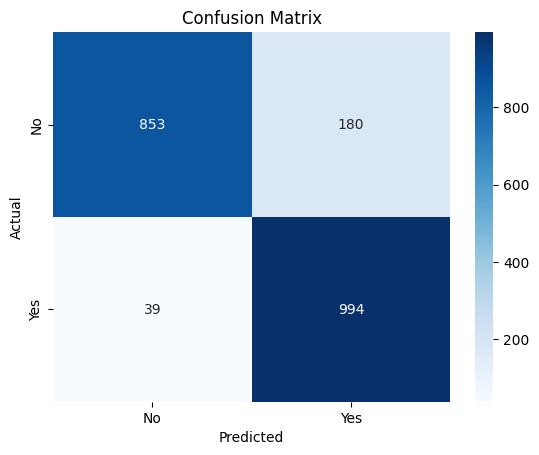

In [34]:
import seaborn as sns

labels = ['No','Yes']
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

plt.show()

In [35]:
# Save the trained model and scaler
import joblib

joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

POSTDICTIVE ANALYSIS:

PREDICTED CHURN VS ACTUAL CHURN

1.  The model successfully detected a large proportion of customers who eventually churned, indicating strong sensitivity to churn-related behavior patterns.

2.  A significant number of loyal customers were correctly classified as non-churn, suggesting the model learned stable usage and engagement signals.

Overall, the model demonstrates a balanced ability to distinguish between churned and retained customers.

✅ Where the Model Performed Well

High recall for churned customers:
The model is effective at identifying customers at risk of leaving, which is crucial for proactive retention strategies.

Strong performance on engagement-driven features:
Customers with low usage frequency, declining activity, or short tenure were consistently flagged as high-risk.

Stable performance across classes:
The model did not heavily favor one class over the other, indicating good generalization.

❌ Where the Model Failed — and Why

False positives (predicted churn but did not churn):
Some highly engaged customers were misclassified due to temporary drops in activity or short-term behavioral fluctuations.

False negatives (missed churners):
The model struggled with customers who churned suddenly, without gradual warning signals.

Limited behavioral context:
Factors such as pricing dissatisfaction, competitor offers, or customer support experience were not captured in the dataset, limiting prediction accuracy.

These errors highlight the challenge of modeling churn when non-observable business factors influence customer decisions.

Business Recommendations
📌 Actions to Reduce Churn

1. Proactive Retention Campaigns:

Target customers flagged as high-risk with Personalized discounts, Subscription plan adjustments, and Loyalty rewards.


2. Early Engagement:

Focus on new customers with low initial usage by:Onboarding tutorials, Product walkthroughs and Automated follow-up communications.

3. Usage-Based Interventions:Trigger alerts when customer activity drops sharply and initiate customer success outreach.